In [ ]:
import os
import sys
import numpy as np
from pathlib import Path
from keras import datasets
import matplotlib.pyplot as plt

# Add the path to the custom library to the system path
sys.path.append(str(Path().resolve().parent.parent))

# Import the module from the custom library
from src import Tensor, metrics
from src.architectures.sequential import Sequential
from src.core.utils import data_analysis, context_manager

### Constants


In [3]:
# Define constants
model_path = os.path.join(os.getcwd(), 'checkpoints', 'fashion_mnist_classifier')
batch_size = 256

# Fashion-MNIST label names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Load dataset


In [4]:
# Load the dataset
(_, _), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Add channel dimension
test_images = np.expand_dims(test_images, axis=-1)

# Convert to tensors
X_test = Tensor(np.array(test_images, dtype=np.float32))
y_test = Tensor(np.array(test_labels), dtype=np.int8)

# Normalize inputs
X_test = X_test / 255.0

### Load the model


In [5]:
# Load the trained model
model: Sequential = Sequential.load(model_path)

# Set the model to evaluation mode
model.eval()

### Inference


In [6]:
# Set the context manager to no_grad to disable gradient tracking during inference
with context_manager.no_grad():
    # Compute logits/probabilities
    preds = model(x=X_test, batch_size=batch_size, verbose=True)

# Convert probabilities to predicted class ids
predictions = Tensor(np.argmax(preds.output.data, axis=1), dtype=np.int8)

# Compute metrics
accuracy = metrics.accuracy(y_test, predictions)
confusion_matrix = metrics.confusion_matrix(len(class_names), y_test, predictions)

# Print accuracy
print(f'\nAccuracy: {accuracy.data:.4f}')

Processing batch 40/40 - 95.8 ms/steppp
Accuracy: 0.9166


### Display predictions


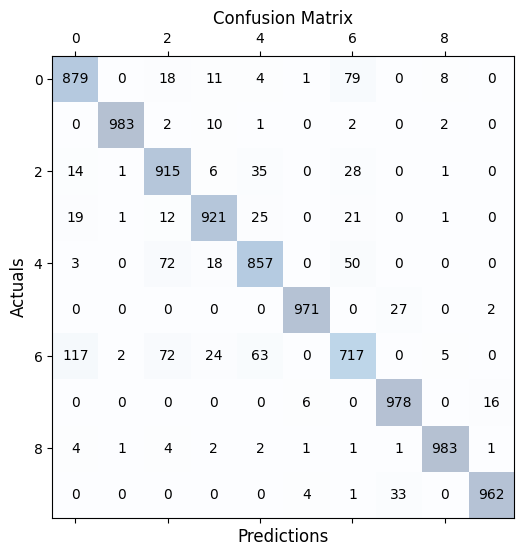

In [7]:
# Plot confusion matrix
data_analysis.plot_confusion_matrix(confusion_matrix)

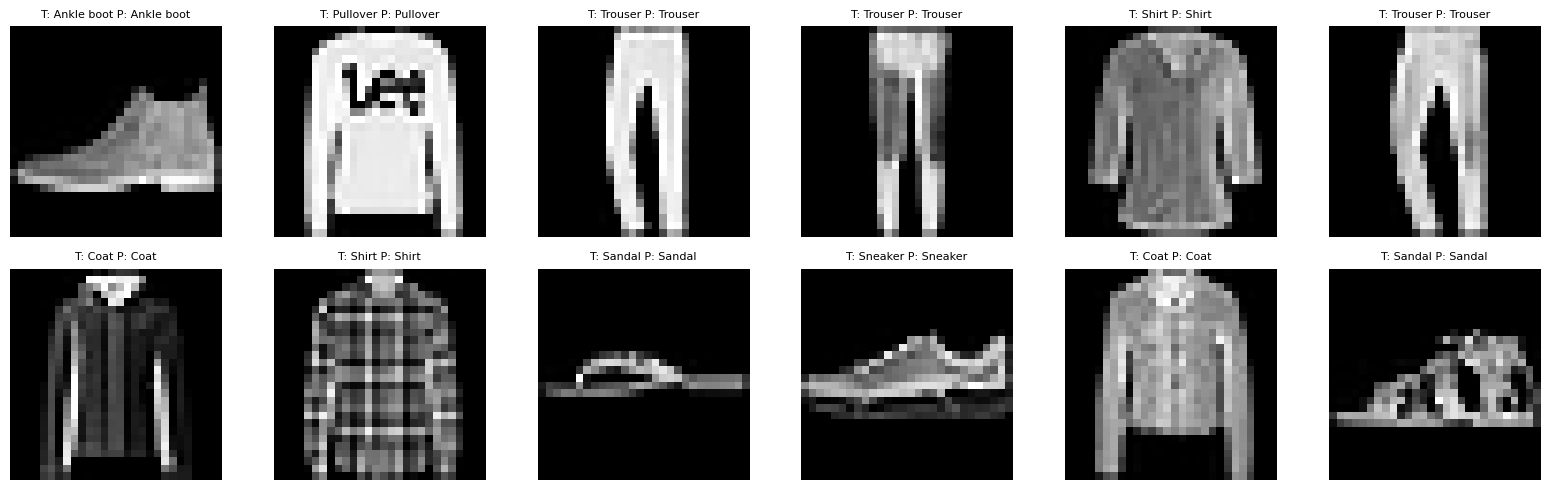

In [8]:
# Plot a few predictions
n_samples = 12
plt.figure(figsize=(16, 5))
for i in range(n_samples):
    plt.subplot(2, 6, i + 1)
    plt.imshow(X_test.data[i].squeeze(), cmap='gray')
    true_label = class_names[int(y_test.data[i])]
    pred_label = class_names[int(predictions.data[i])]
    plt.title(f'T: {true_label} P: {pred_label}', fontsize=8)
    plt.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()